# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

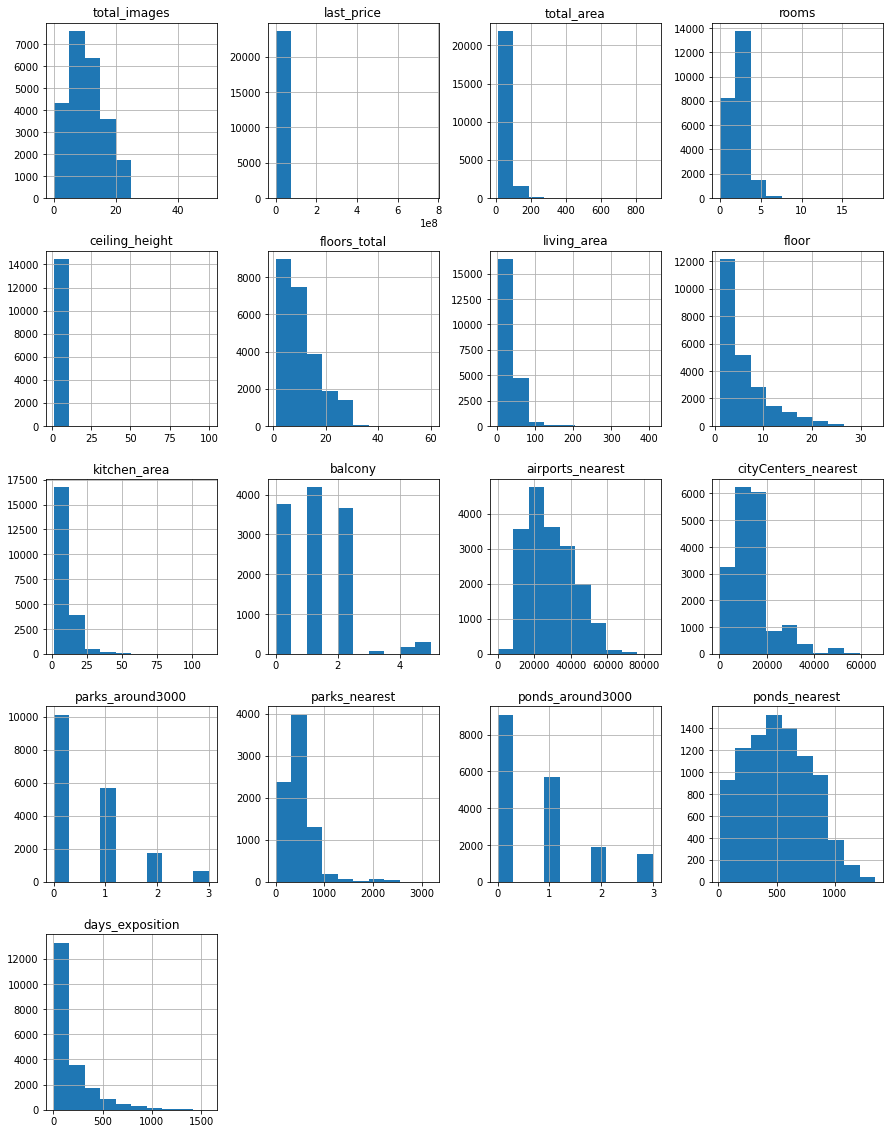

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
df.hist(figsize=(15, 20))

In [27]:
print('Количество дубликатов:', df.duplicated().sum())
df.head(15)

Количество дубликатов: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


# Предобработка данных

Рассмотрим датасет на пропуски, аномалии и изменим тип столбца,где это возможно.

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
print(df.isna().sum())
df.describe()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


        Мы видим, что достаточно много пропусков в датасете, однако не все из них возможно устранить. Например в столбцах с расстоянием до аэропорта, от центра, до близжайшего парка и пруда данные могли быть пропущенны, если картографические   данные стали применяться к объявлениям не сразу, а с какой-то конкретной даты, или продавец не указал геоданные об объекте продажи при заполнении объявления. Еще причина - техническая ошибка, т.к. количество пропусков в названных выше столбцах немного отличается между собой.
          Столбец is_apartment имеет наибольшую долю пропусков,  они  могли образоваться из-за того, что продавцы не знают значения данного параметра и просто его пропускали при оформлении объявления. Заполнять эти пропуски не будет верно, оставлю как есть.
          Пропуски в столбце days_exposition могут быть , например, по причине того, что во время выгрузки эти объявления все еще были открыты.
          floors_total, locality_name - единственная идея о пропусках в этих столбцах это невнимательность, случайнные пропуски.
          ceiling_height, living_area, kitchen_area - лень посчитать/измерить параметры- отсюда могут быть пропуски, также возможны пропуски в площадях среди объявлений о продаже студий и кв. с открытой планировкой. Либо в случае с потлками - типовые значения, продавец посчитал , что указывать эту инф-ию нет необходимости.
        Аномалии в данных обнаруживаются в стобцах ceiling_height- слишком низкие и слишком высокие значения, living_area	и kitchen_area слишком низкие значения, а также квартира в аэропорту(airports_neares минимальное знач = 0), и подозрително низкая цена = 12190.
        Рассмотрим подробнее ниже.


In [12]:
rows = df['days_exposition'] == -1
df_days = df.loc[rows]
df_days['year'].value_counts()


2019    1788
2018     957
2017     271
2015      70
2016      67
2014      18
Name: year, dtype: int64

In [18]:
df[df['last_price'] < 500000]  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,"450,000.00",42.00,2017-07-31T00:00:00,2,NaN,1.00,23.00,1,NaN,...,5.80,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.00
6859,6,"490,000.00",40.00,2017-12-11T00:00:00,1,NaN,5.00,NaN,3,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.00
8793,7,"12,190.00",109.00,2019-03-20T00:00:00,2,2.75,25.00,32.00,25,NaN,...,40.50,NaN,Санкт-Петербург,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8.00
9581,7,"450,000.00",43.40,2018-08-31T00:00:00,2,NaN,5.00,30.30,3,NaN,...,5.50,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.00
10782,3,"490,000.00",29.10,2016-05-05T00:00:00,1,2.50,5.00,17.00,5,NaN,...,5.50,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.00
14911,5,"430,000.00",54.00,2018-06-26T00:00:00,2,NaN,3.00,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00
16032,8,"480,000.00",32.00,2019-01-06T00:00:00,1,NaN,2.00,16.00,1,NaN,...,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.00
16219,14,"450,000.00",38.50,2018-07-11T00:00:00,2,2.65,2.00,NaN,1,NaN,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.00
16274,18,"440,000.00",40.00,2018-07-10T00:00:00,1,NaN,5.00,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00
17456,7,"430,000.00",30.40,2019-04-22T00:00:00,1,NaN,2.00,16.00,1,NaN,...,6.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Скорее всего продавец указал цену в тысячах р., исправим на рубли
df.loc[8793,'last_price'] = 12190000

In [3]:
# удалим квартиру в аэропорту.Такая всего одна.
#восстановить расстояние не сможем, тк не обладаем такой информацией.Природа ошибки может быть и техническая и пользовательская.
df = df[df['airports_nearest'] != 0]
# удалим пропуски в этажности и названии населенного пункта. 
#Их немного, составляют меньше 1% от датасета, такая потеря несущественна
df.dropna(subset=['floors_total', 'locality_name'], inplace = True) 

In [3]:
df[df['ceiling_height'] < 2.4] #отфильтруем по значениям ниже 2,4

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000.0,47.00,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,NaN,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1582,4,4100000.0,45.60,2016-01-13T00:00:00,2,2.30,9.0,28.400000,8,False,...,7.00,2.0,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,NaN,...,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5498,17,2200000.0,56.00,2018-04-02T00:00:00,2,2.30,5.0,45.000000,1,NaN,...,9.00,2.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.500000,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.200000,12,NaN,...,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
12755,2,1400000.0,22.50,2017-09-21T00:00:00,1,2.20,2.0,18.000000,2,NaN,...,4.50,1.0,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Есть потолки со значением 1 / 1,2 /2,0 и др. В этих случаях могла быть обычная опечатка при заполнении, исправим данные намедианное значание. Строку 16934 исправим на 2,75 с 1,75, т.к. очевидно.      

In [4]:
df.loc[[552, 2572, 4212, 5712, 5850, 11352, 16446, 16884, 19098, 19329, 20520, 22590, 22960, 17496], 'ceiling_height'] = df['ceiling_height'].median()
df.loc[16934,'ceiling_height'] = 2.75
df[df['ceiling_height'] < 2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,"2,200,000.00",47.00,2018-01-12T00:00:00,3,2.34,5.00,NaN,1,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.00
1582,4,"4,100,000.00",45.60,2016-01-13T00:00:00,2,2.30,9.00,28.40,8,False,...,7.00,2.00,Санкт-Петербург,"49,152.00","14,977.00",1.00,489.00,1.00,525.00,329.00
5498,17,"2,200,000.00",56.00,2018-04-02T00:00:00,2,2.30,5.00,45.00,1,NaN,...,9.00,2.00,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.00
12755,2,"1,400,000.00",22.50,2017-09-21T00:00:00,1,2.20,2.00,18.00,2,NaN,...,4.50,1.00,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.00
17762,20,"2,300,000.00",54.30,2018-06-28T00:00:00,3,2.30,5.00,39.00,2,NaN,...,5.30,1.00,деревня Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,189.00
17794,1,"2,300,000.00",58.60,2016-05-12T00:00:00,3,2.25,5.00,44.10,3,False,...,5.50,1.00,деревня Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23498,7,"1,600,000.00",54.00,2016-12-26T00:00:00,2,2.30,1.00,33.00,1,False,...,3.50,0.00,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.00


Остались значения не ниже 2,20. Их я не считаю аномалиями или ошибками, т.к. в  хрущевках минимальный потолок 2,48 , и  жильцы могли поднимать пол и натягивать потолок.

In [64]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [65]:
df[df['ceiling_height'] > 4] #Теперь рассмотрим большие значения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.2,2,NaN,...,12.2,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,NaN,...,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [5]:
# применим функцию для ускроения обработки аномалий
# выше видно что высота после значения 14 подойдет для уменьшения на порядок.
def anomalous_height(data):
    if data['ceiling_height'] > 14:
        return data['ceiling_height'] / 10
    else:
        return data['ceiling_height']
    
df['ceiling_height'] = df.apply(anomalous_height, axis=1)  

#остальные ошибки исправим руками
df.loc[[19142],'ceiling_height'] = 2.7 #в данных строках скорее всего имелось ввиду значение 2,7
df.loc[[1053, 6802, 2823, 10159],'ceiling_height'] = 2.5 #в данных строках скорее всего имелось ввиду значение 2,5, остальные заменим медианой
df.loc[[22309,22869, 17442, 15743, 12628, 6617, 5863, 3474, 2639, 15061], 'ceiling_height'] = df['ceiling_height'].median()

df[df['ceiling_height'] > 4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,"8,200,000.00",80.00,2018-11-06T00:00:00,3,4.15,3.00,44.20,2,NaN,...,12.20,NaN,Санкт-Петербург,"20,562.00","3,167.00",2.00,344.00,1.00,838.00,38.00
464,15,"66,571,000.00",280.30,2015-06-11T00:00:00,6,5.20,8.00,159.50,7,NaN,...,21.10,0.00,Санкт-Петербург,"26,316.00","6,655.00",3.00,187.00,1.00,616.00,578.00
1026,20,"155,000,000.00",310.00,2018-10-12T00:00:00,5,5.30,3.00,190.00,3,NaN,...,63.00,2.00,Санкт-Петербург,"24,899.00","4,785.00",0.00,NaN,1.00,603.00,NaN
1129,20,"6,695,000.00",36.90,2018-09-28T00:00:00,1,4.06,5.00,22.00,2,NaN,...,7.20,NaN,Санкт-Петербург,"21,725.00","2,990.00",1.00,596.00,1.00,866.00,110.00
1300,14,"120,000,000.00",280.00,2018-07-12T00:00:00,5,4.70,4.00,162.00,3,NaN,...,30.00,NaN,Санкт-Петербург,"24,680.00","4,247.00",1.00,464.00,3.00,339.00,225.00
1388,20,"59,800,000.00",399.00,2015-01-21T00:00:00,5,5.60,6.00,NaN,6,NaN,...,NaN,0.00,Санкт-Петербург,"26,204.00","6,934.00",2.00,149.00,2.00,577.00,719.00
2802,7,"14,950,000.00",50.00,2016-03-06T00:00:00,2,4.80,3.00,30.00,2,NaN,...,10.00,0.00,Санкт-Петербург,"24,433.00","1,725.00",1.00,589.00,3.00,161.00,160.00
2843,15,"11,990,000.00",104.00,2018-03-13T00:00:00,3,4.20,3.00,66.00,2,NaN,...,15.00,NaN,Санкт-Петербург,"22,393.00","3,884.00",0.00,NaN,0.00,NaN,350.00
2999,11,"4,450,000.00",36.00,2017-12-12T00:00:00,1,4.19,5.00,18.00,1,NaN,...,8.00,NaN,Санкт-Петербург,"24,689.00","4,256.00",1.00,"1,077.00",3.00,690.00,78.00
3067,13,"6,600,000.00",95.00,2018-09-08T00:00:00,2,4.50,7.00,45.00,7,True,...,25.00,2.00,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.00


Оставшиеся высокие значения потолков могу быть вполне реальными исходя из площади и расположения, их менять не буду.

In [37]:
#Далее рассмотрим аномально высокие здания.
df[df['floors_total'] > 35]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.4,28,NaN,...,18.70,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.40,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,2.70,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.70,36.0,40.0,29,NaN,...,12.00,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.00,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,2.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


Аномалии в этом случае могли появиться во время ввода данных из-за невнимательности, простая опечатка. Таких значений немного, легко их исправим руками.

In [6]:
df.loc[2253,'floors_total'] = 6
df.loc[16934,'floors_total'] = 36 #судя по картографич.данным квартиры с индексами 5807, 11079, 16934 расположены в одном доме
df.loc[16731,'floors_total'] = 22
df[df['floors_total'] > 35]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,"5,990,000.00",54.00,2018-03-22T00:00:00,2,NaN,36.00,21.40,28,NaN,...,18.70,1.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,11.00
5807,17,"8,150,000.00",80.00,2019-01-09T00:00:00,2,2.70,36.00,41.00,13,NaN,...,12.00,5.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,38.00
11079,16,"9,200,000.00",75.00,2019-02-22T00:00:00,2,2.70,36.00,40.00,29,NaN,...,12.00,2.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,NaN
16934,5,"4,100,000.00",40.00,2017-10-17T00:00:00,1,2.75,36.00,17.40,5,NaN,...,8.34,NaN,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,71.00


In [39]:
#Рассмотрим аномалии в площади кухонь.
df[df['kitchen_area'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,NaN,...,2.00,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
6262,9,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5.0,16.0,5,NaN,...,2.00,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
7950,3,5967734.0,66.40,2017-02-07T00:00:00,2,NaN,4.0,44.4,2,False,...,2.89,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
8729,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3.0,14.0,3,NaN,...,2.40,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
9138,17,2920000.0,23.29,2018-12-12T00:00:00,1,NaN,3.0,21.0,1,NaN,...,2.00,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
11033,6,5350000.0,32.00,2016-04-20T00:00:00,1,NaN,14.0,16.0,10,NaN,...,2.00,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
16367,2,2720000.0,25.70,2017-10-30T00:00:00,1,NaN,19.0,22.6,11,NaN,...,2.00,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
17834,5,2940000.0,34.70,2017-10-09T00:00:00,1,NaN,26.0,15.5,14,NaN,...,2.30,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
19642,5,1190000.0,14.00,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,...,2.00,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
20217,7,4250000.0,28.50,2019-05-01T00:00:00,1,2.80,14.0,19.5,10,NaN,...,1.30,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN


In [7]:
#Аномально маленькие кухни при общей площади больше 30кв.м. исправим, прибавив 10
df.loc[[7950, 11033, 17834], 'kitchen_area'] = df.loc[[7950, 11033, 17834], 'kitchen_area'] + 10
df[df['kitchen_area'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,"2,600,000.00",27.00,2017-07-10T00:00:00,1,2.75,23.00,18.00,18,NaN,...,2.00,0.00,Санкт-Петербург,"22,131.00","17,459.00",0.00,NaN,1.00,411.00,10.00
6262,9,"3,100,000.00",24.00,2018-06-25T00:00:00,2,3.00,5.00,16.00,5,NaN,...,2.00,NaN,Санкт-Петербург,"31,960.00","4,914.00",2.00,426.00,1.00,936.00,54.00
8729,9,"2,200,000.00",18.40,2018-08-20T00:00:00,1,2.52,3.00,14.00,3,NaN,...,2.40,NaN,Пушкин,"20,710.00","30,687.00",0.00,NaN,1.00,155.00,59.00
9138,17,"2,920,000.00",23.29,2018-12-12T00:00:00,1,NaN,3.00,21.00,1,NaN,...,2.00,NaN,Санкт-Петербург,"19,506.00","4,008.00",0.00,NaN,2.00,45.00,107.00
16367,2,"2,720,000.00",25.70,2017-10-30T00:00:00,1,NaN,19.00,22.60,11,NaN,...,2.00,NaN,Санкт-Петербург,"14,472.00","13,268.00",0.00,NaN,0.00,NaN,109.00
19642,5,"1,190,000.00",14.00,2018-07-29T00:00:00,1,NaN,5.00,11.00,1,NaN,...,2.00,NaN,Санкт-Петербург,"9,898.00","11,122.00",0.00,NaN,0.00,NaN,4.00
20217,7,"4,250,000.00",28.50,2019-05-01T00:00:00,1,2.80,14.00,19.50,10,NaN,...,1.30,NaN,Санкт-Петербург,"37,199.00","12,721.00",0.00,NaN,0.00,NaN,NaN
21419,4,"1,870,000.00",20.00,2018-03-06T00:00:00,1,2.50,5.00,14.00,1,NaN,...,2.00,NaN,Санкт-Петербург,"16,652.00","15,654.00",1.00,619.00,1.00,937.00,45.00


Оставшиеся значения исправлять не стану, тк похоже, что здесь за квартиры выдают комнаты в коммунальных квартирах с оборудованными кухонными зонами, либо студии.

In [8]:
# Проверим маленькие значения жилой площади
df[df['living_area'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.3,7,NaN,...,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.00,2017-10-31T00:00:00,1,NaN,8.0,9.0,2,NaN,...,23.0,NaN,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.00,2017-01-29T00:00:00,2,2.70,25.0,9.0,15,NaN,...,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.40,2017-06-15T00:00:00,2,2.60,9.0,8.4,6,NaN,...,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.00,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.80,2017-06-19T00:00:00,1,2.70,23.0,9.0,15,NaN,...,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
4542,12,3300000.0,18.00,2018-11-07T00:00:00,1,3.50,5.0,9.0,2,NaN,...,NaN,NaN,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
7312,8,3400000.0,27.00,2018-02-21T00:00:00,2,2.50,15.0,9.0,4,NaN,...,16.0,NaN,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.00,2017-10-25T00:00:00,2,NaN,5.0,9.0,2,NaN,...,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.00,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


In [8]:
#Аномально маленькие жилые площади
df.loc[[3242, 17582, 21758], 'living_area'] = df.loc[[7950, 11033, 17834], 'kitchen_area'] + 10
df.loc[13915, 'living_area'] = 32
df.loc[21943, 'living_area'] = 54
df.loc[23574, 'living_area'] = 80
df.loc[8325, 'living_area'] = 39
#в следующих квартирах пользователями, скорее всего, перепутаны значения кухни и жилой площади. Исправим.
df.loc[1326, 'living_area'] = 32
df.loc[1326, 'kitchen_area'] = 9
df.loc[2309, 'living_area'] = 41
df.loc[2309, 'kitchen_area'] = 8.4
df.loc[20994, 'living_area'] = 31
df.loc[20994, 'kitchen_area'] = 8
df.loc[16431, 'living_area'] = 17
df.loc[16431, 'kitchen_area'] = 6
df.loc[19251, 'living_area'] = 18
df.loc[19251, 'kitchen_area'] = 6.5
df[df['living_area'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,"4,000,000.00",21.40,2019-02-07T00:00:00,1,2.90,8.00,8.30,7,NaN,...,6.30,NaN,Санкт-Петербург,"27,089.00","5,791.00",2.00,488.00,1.00,286.00,NaN
680,14,"7,200,000.00",43.00,2017-10-31T00:00:00,1,NaN,8.00,9.00,2,NaN,...,23.00,NaN,Санкт-Петербург,"23,900.00","5,232.00",1.00,"2,137.00",1.00,933.00,296.00
4100,17,"5,300,000.00",34.80,2017-06-19T00:00:00,1,2.70,23.00,9.00,15,NaN,...,17.10,0.00,Санкт-Петербург,"33,626.00","13,495.00",0.00,NaN,0.00,NaN,30.00
4542,12,"3,300,000.00",18.00,2018-11-07T00:00:00,1,3.50,5.00,9.00,2,NaN,...,NaN,NaN,Санкт-Петербург,"25,157.00","4,948.00",2.00,349.00,1.00,963.00,9.00
7312,8,"3,400,000.00",27.00,2018-02-21T00:00:00,2,2.50,15.00,9.00,4,NaN,...,16.00,NaN,Санкт-Петербург,"50,246.00","16,444.00",1.00,617.00,0.00,NaN,NaN
15833,20,"4,600,000.00",33.00,2017-01-01T00:00:00,1,2.70,22.00,9.00,12,NaN,...,14.30,1.00,Санкт-Петербург,"33,803.00","13,671.00",0.00,NaN,0.00,NaN,511.00
17248,20,"5,300,000.00",33.00,2017-04-14T00:00:00,1,2.70,22.00,8.90,16,NaN,...,16.10,1.00,Санкт-Петербург,"33,803.00","13,671.00",0.00,NaN,0.00,NaN,216.00
19620,10,"4,300,000.00",33.00,2018-02-01T00:00:00,1,NaN,5.00,9.00,1,NaN,...,17.00,NaN,Санкт-Петербург,"22,525.00","2,976.00",2.00,251.00,3.00,220.00,86.00
21505,9,"4,100,000.00",35.30,2018-01-10T00:00:00,1,2.75,27.00,8.50,11,NaN,...,16.10,2.00,Санкт-Петербург,"33,977.00","15,076.00",0.00,NaN,0.00,NaN,60.00
21908,9,"5,300,000.00",46.30,2018-03-20T00:00:00,1,2.75,7.00,9.80,3,NaN,...,26.00,NaN,Сестрорецк,"55,422.00","32,352.00",0.00,NaN,1.00,"1,144.00",36.00


       
       Ошибки в жилой площади могли образоваться в следствие опечатки при заполнении продавцами объявлений.
        Оставшиеся малые площади являются условной нормой, тк квартиры типа "еврооднушка"  имеют большие кухни-гостинные и малые жилые комнаты, либо сюда попали комнаты в коммуналках, которые выдают за квартиры.

In [9]:
# изменим тип данных с  float на int, этажность -целое число.
df['floors_total'] = df['floors_total'].astype('int')

# Уберем копейки в цене, поменяем тип на int
df['last_price'] = df['last_price'].astype('int')

# Пустые значения в количестве дней размещения объявления  заполним метками и изменим тип данных на целочисленный 
df['days_exposition'] = df['days_exposition'].fillna(-1).astype('int')

# Отформатируем дату в удобный для восприятия формат. и для дальнейших преобразований и работы со столбцом.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# пропущены скорее всего значения типовых потолков, их можно заполнить медианным значением -  2,65,
# хотя острой необходимости в данном действии нет, все же сделаем это.
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

# Пустые значения в количестве парков и прудов заполним 0,
# т.к. если эти данные не указаны, то в примелемых границах их попросту нет
# Изменим тип данных на int, т.к. количество парков/прудов - может быть только целое число 
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

# Пропуски в количестве балконов заполним 0, т.к. скорее всего, пропуск означает отсутствие такового,
# и продавец не потрудился заполнить.
# Изменим тип данных на int. количество балконов -только целое число 
df['balcony'] = df['balcony'].fillna(0).astype('int')

# Пропуски в столбцах living_area и kitchen_area заполним с помощью нахождения их доли в общей площади
area_rate = df['living_area'].median() / df['total_area'].median()
kitchen_rate = df['kitchen_area'].median() / df['total_area'].median()
df['living_area'] = df['living_area'].fillna(df['total_area']*area_rate)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*kitchen_rate)

# Проверим,все ли возможные или вредные пропуски заполнены и все ли нужные типы столбцов теперь имеем.
print(df.isna().sum())
df.info()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20804
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15534
ponds_around3000            0
ponds_nearest           14528
days_exposition             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  i

Удалим  обнаруженные неявные возможные дубликаты в столбце 'locality_name'. Заменим слово "посёлок" на "поселок" и другие названия в разных формах написания, но обозначающих один и тот же нвселенный пункт.

In [10]:
df['locality_name'] = (df['locality_name'].str.replace('посёлок', 'поселок', regex=True)
                       .str.replace('поселок Мурино', 'Мурино', regex=True)
                       .str.replace('городской поселок Рощино', 'Рощино', regex=True)
                       .str.replace('поселок городского типа Рощино', 'Рощино', regex=True)
                       .str.replace('деревня Кудрово', 'Кудрово', regex=True)
                       .str.replace('деревня Фёдоровское', 'городской поселок Фёдоровское', regex=True)
                       .str.replace('поселок Любань', 'Любань', regex=True)
                       .str.replace('поселок городского типа Мга', 'городской поселок Мга', regex=True)
                       .str.replace('поселок городского типа Рябово', 'поселок Рябово', regex=True)
                      )
df['locality_name'].unique()


array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'городской поселок Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сл

In [31]:
#Проверим дубликаты.
df.duplicated().sum()

0

        Дубликатов не обнаружено.
        
        Снова вызовем describe, чтобы убедиться, что все исправили.

In [20]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","18,040.00","18,063.00","23,564.00","8,030.00","23,564.00","9,036.00","23,564.00"
mean,9.88,"6,540,555.54",60.32,2.07,2.70,10.67,34.64,5.88,10.50,0.59,"28,798.68","14,192.18",0.47,490.58,0.59,518.29,156.29
std,5.68,"10,911,145.03",35.66,1.08,0.22,6.58,22.39,4.87,6.03,0.96,"12,631.03","8,613.35",0.75,341.57,0.88,278.01,213.62
min,0.00,"430,000.00",12.00,0.00,2.20,1.00,7.50,1.00,1.30,0.00,"6,450.00",181.00,0.00,1.00,0.00,13.00,-1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,"18,571.00","9,238.00",0.00,288.00,0.00,293.00,22.00
50%,9.00,"4,646,500.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,"26,757.00","13,095.00",0.00,455.00,0.00,503.00,73.00
75%,14.00,"6,790,000.00",69.70,3.00,2.70,16.00,42.12,8.00,12.00,1.00,"37,273.00","16,285.00",1.00,612.00,1.00,730.00,198.00
max,50.00,"763,000,000.00",900.00,19.00,6.00,36.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


ВЫВОД: Все аномалии исправлены, возможные пропуски заполнены. Предобработка завершена. После очистки данных  имеем:

1.Общая площадь в датасете от 12 до 900 м2, среднее значение 60.3 м2, медианное 52 м2. 
2.Количество комнат колеблется от 0 до 19. Значение 0 характерно для квартир-студий и квартир с открытой планировкой. Медианное значение 2, значит половину датасета занимают квартиры с 1 комнатой и их  в продаже больше всего.
3.Высота потолков от 2,2 м до 6м, в среднем 2,69 м, медиана 2,65 м.
4.Предложения квартир есть как и в самом центре, так и в разных уголках ЛО. Так есть квартиры расположенные очень близко к аэропорту, практически за его территорией.
5.Есть объявления, которые провисели всего 1 день, максимальное время размещения 1580 дней. 


# Посчитайте и добавьте в таблицу новые столбцы

In [11]:
#Добавим цену квадратного метра в новом столбике
df['cost_per_m2'] = (df['last_price'] / df['total_area']).round(2)

# Создадим столбцы с днем недели, месяцем и годом размещения объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] =  df['first_day_exposition'].dt.month
df['year'] =  df['first_day_exposition'].dt.year

# Категоризируем  стодбец floor по значениям на "первый", "последний", "другой" этажи
df['type_floor'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['type_floor'] = np.where(df['floor'] == df['floors_total'], 'последний', df['type_floor'])

#Переведем расстояние до центра из метров в км.
df['cityCenters_km'] = (df['cityCenters_nearest'] /1000).round()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int64         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

# Проведите исследовательский анализ данных

###  Изучение параметров объекта

In [34]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m2,weekday,month,year,cityCenters_km
count,"23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00",...,"23,564.00","8,030.00","23,564.00","9,036.00","23,564.00","23,564.00","23,564.00","23,564.00","23,564.00","18,063.00"
mean,9.88,"6,540,555.54",60.32,2.07,2.70,10.67,34.64,5.88,10.50,0.59,...,0.47,490.58,0.59,518.29,156.29,"99,406.24",2.57,6.40,"2,017.37",14.19
std,5.68,"10,911,145.03",35.66,1.08,0.22,6.58,22.39,4.87,6.03,0.96,...,0.75,341.57,0.88,278.01,213.62,"50,382.01",1.79,3.49,1.04,8.62
min,0.00,"430,000.00",12.00,0.00,2.20,1.00,7.50,1.00,1.30,0.00,...,0.00,1.00,0.00,13.00,-1.00,"7,962.96",0.00,1.00,"2,014.00",0.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,...,0.00,288.00,0.00,293.00,22.00,"76,566.54",1.00,3.00,"2,017.00",9.00
50%,9.00,"4,646,500.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,...,0.00,455.00,0.00,503.00,73.00,"95,000.00",3.00,6.00,"2,017.00",13.00
75%,14.00,"6,790,000.00",69.70,3.00,2.70,16.00,42.12,8.00,12.00,1.00,...,1.00,612.00,1.00,730.00,198.00,"114,213.20",4.00,10.00,"2,018.00",16.00
max,50.00,"763,000,000.00",900.00,19.00,6.00,36.00,409.70,33.00,112.00,5.00,...,3.00,"3,190.00",3.00,"1,344.00","1,580.00","1,907,500.00",6.00,12.00,"2,019.00",66.00


Мода: 0   45.00
dtype: float64


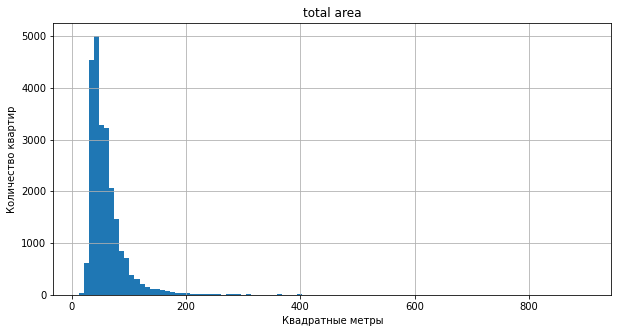

In [60]:
# общая площадь
df['total_area'].plot(kind='hist', figsize=(10, 5), bins=100, title='total area', grid=True, range=(12,900))
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')
print('Мода:', df['total_area'].mode())


            Оснонвная часть выборки находится в диапозоне от 40 м2 до 70 м2. Наиболее часто встречаются объявления о продаже квартир с площадью 45кв.м. Средняя площадь - 60,3 м2, медиана - 52м2. 

Мода: 0   18.00
dtype: float64


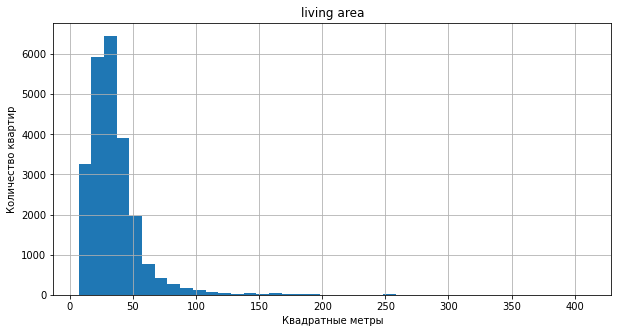

In [61]:
# жилая площадь
df['living_area'].plot(kind='hist', figsize=(10, 5), bins=40, title='living area', grid=True, range=(7,409))
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')
print('Мода:', df['living_area'].mode())

         Оснонвная часть выборки находится в диапозоне от 19 м2 до 42 м2. Наиболее часто встречаются объявления с жилой площадью 18 кв.м. Средняя площадь - 35 м2, медиана - 30 м2. 
           

Мода: 0   6.00
dtype: float64


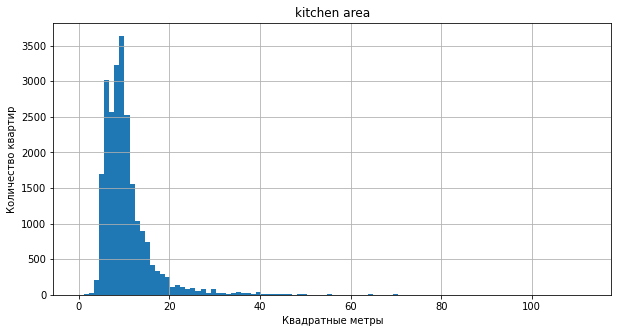

In [62]:
# Площадь кухни
df['kitchen_area'].plot(kind='hist', figsize=(10, 5), bins=100, title='kitchen area', grid=True, range=(0, 112))
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')
print('Мода:', df['kitchen_area'].mode())

         Оснонвная часть выборки находится в диапозоне от 7 м2 до 12 м2. Наиболее часто встречаются объявления с площадью кухни 6 кв.м. Средняя площадь - 10,5 м2, медиана - 9м2. 

Мода: 0    4500000
dtype: int64


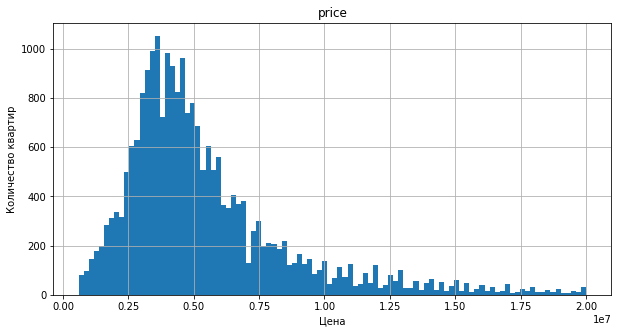

In [63]:
# Цена объкекта
df['last_price'].plot(kind='hist', figsize=(10, 5), bins=100, title='price', grid=True, range=(600000, 20000000))
plt.ylabel('Количество квартир')
plt.xlabel('Цена')
print('Мода:', df['last_price'].mode())

        
        Разброс цен очень велик, т.к. на рынке представлены объекты от микроквартир до жилья не в один этаж, но в среднем стоимость квартиры в СПБ и ЛО 6,5 млн.р, наиболее часто объекты продаются за 4,5 млн.р., медиана = 4,65 млн.р.

Мода: 0    1
dtype: int64


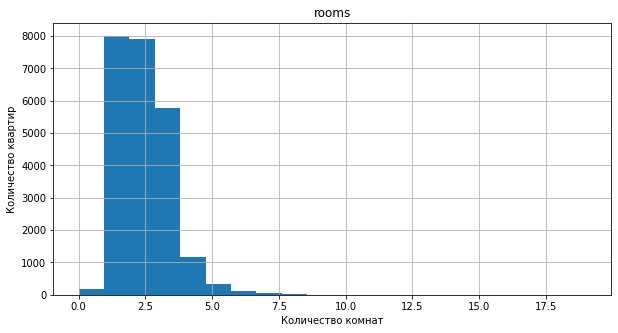

In [26]:
# Количество комнат
df['rooms'].plot(kind='hist', figsize=(10, 5), bins=20, title='rooms', grid=True, range=(0, 19))
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
print('Мода:', df['rooms'].mode())


        Основная часть объектов состоит из 1-3 комнат, чаще всего покупателя ищут обладатели 1-комнатных квартир. Квартир с 7-ю комнатами и выше мало, встречаются редко.

Мода: 0   2.65
dtype: float64


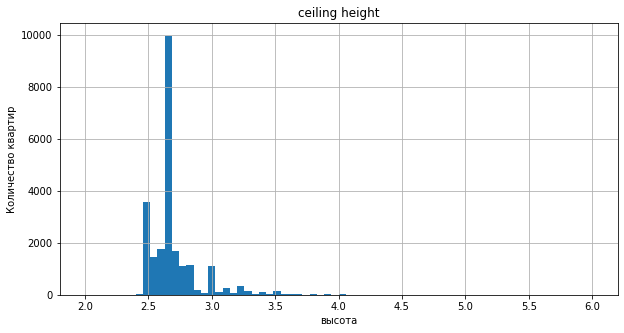

In [27]:
# Высота потолков
df['ceiling_height'].plot(kind='hist', figsize=(10, 5), bins=70, title='ceiling height', grid=True, range=(2, 6))
plt.ylabel('Количество квартир')
plt.xlabel('высота')
print('Мода:', df['ceiling_height'].mode())

        
        Высота потолков в основном состоит из значений от 2,6 до 2,7, максимально значение = 6 м, среднее- 2,7м., медиана=моде - 2,65м.
        
           До заполнения пропусков медианой значения колебались в основном от 2,52 м. до 2,8 м. Медиана - 2,65.

Мода: 0    2
dtype: int64


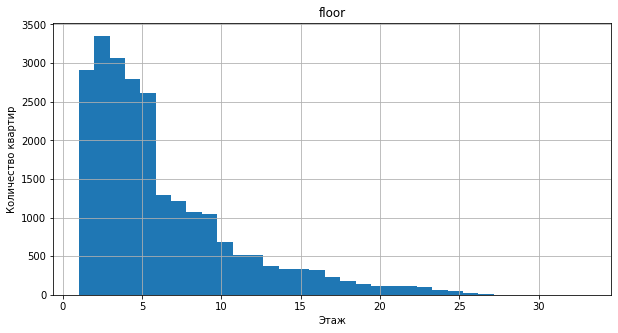

In [28]:
# Этаж квартиры
df['floor'].plot(kind='hist', figsize=(10, 5), bins=33, title='floor', grid=True, range=(1, 33))
plt.ylabel('Количество квартир')
plt.xlabel('Этаж')
print('Мода:', df['floor'].mode())

        
        Чаще всего встречаются объявления о продаже объекта на 2-ом этаже, основная часть квартир на 2-8 этажах. Медиана - 4, среднее - 6

Мода: 0    другой
dtype: object


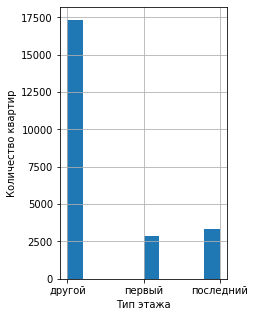

In [29]:
# Тип этажа квартиры
df['type_floor'].hist(figsize=(3, 5))
plt.ylabel('Количество квартир')
plt.xlabel('Тип этажа')
print('Мода:', df['type_floor'].mode())

        Меньше всего объявлений о продаже квартир на первом этаже, возможно из-за тренда на расположение коммерции на первых этажах. Больше всего объявлений в категории "другой".

Мода: 0    5
dtype: int64


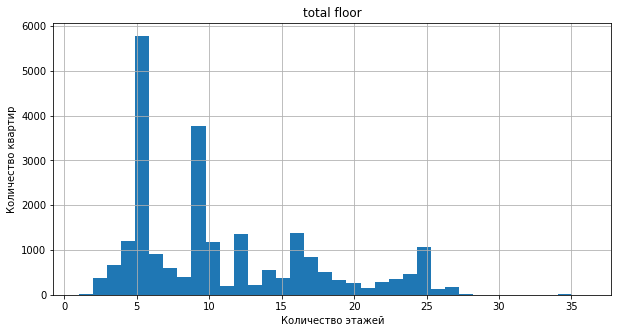

In [30]:
# общее количество этажей в доме
df['floors_total'].plot(kind='hist', figsize=(10, 5), bins=36, title='total floor', grid=True, range=(1, 36))
plt.ylabel('Количество квартир')
plt.xlabel('Количество этажей')
print('Мода:', df['floors_total'].mode())

        
        В основной массе объявлений квартиры находятся в домах с этажностью от 5 до 9 этажей. Чаще всего встречаются пятиэтажки, реже всего дома от 25 этажей. Среднее значение 10 эт, медиана - 9 эт.

Мода: 0   8,460.00
dtype: float64


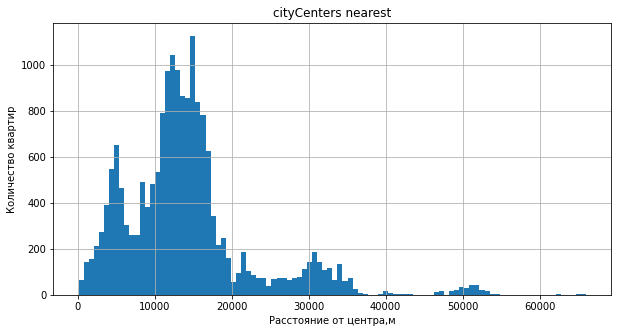

In [31]:
# Расстояние от центра города в метрах
df['cityCenters_nearest'].plot(kind='hist', figsize=(10, 5), bins=100, title='cityCenters nearest', grid=True, range=(150, 66000))
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние от центра,м')
print('Мода:', df['cityCenters_nearest'].mode())


            Большинство квартир находится на расстоянии от центра в интервале 9,24 км - 16,3 км. Среднее 14,2 км, медиана 13 км. Мода 8,46 км- в черте города. Реже встречаются объявления из далеких от города поселений ЛО.

Мода: 0   37,434.00
dtype: float64


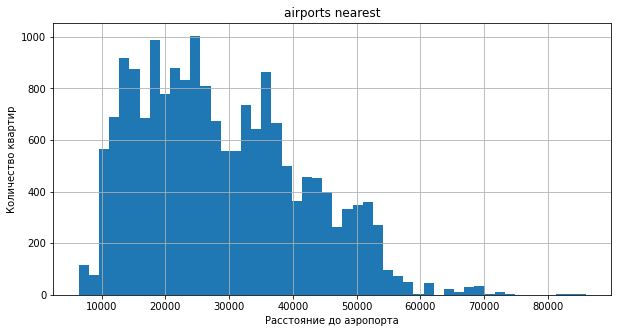

In [32]:
# Растояние до аэропорта
df['airports_nearest'].plot(kind='hist', figsize=(10, 5), bins=50, title='airports nearest', grid=True, range=(6400, 86000))
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до аэропорта')
print('Мода:', df['airports_nearest'].mode())


        Самое частое расстояние до аэропорта, которое встречается в датасете = 37,4 км . Медиана = 26,75 км, Среднее 28,8 км

Мода: 0   441.00
dtype: float64


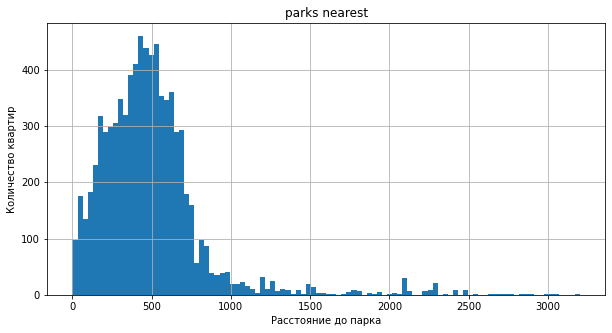

In [33]:
# Расстояние до ближайшего парка
df['parks_nearest'].plot(kind='hist', figsize=(10, 5), bins=100, title='parks nearest', grid=True, range=(1, 3200))
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до парка')
print('Мода:', df['parks_nearest'].mode())

  Большинство квартир находится на расстоянии от парка в интервале 288 м - 612 м. Среднее 490 м, медиана 455 м. Мода 441 м. 

Мода: 0    3
dtype: int64


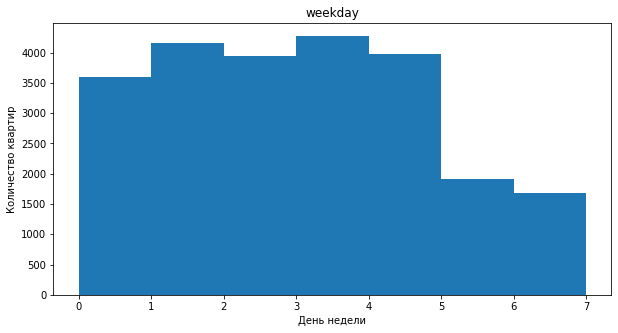

In [34]:
# День публикации
df['weekday'].plot(kind='hist', figsize=(10, 5), bins=7, title='weekday', range=(0, 7))
df['weekday'].describe()
plt.ylabel('Количество квартир')
plt.xlabel('День недели')
print('Мода:', df['weekday'].mode())

Мода: 0    2
dtype: int64


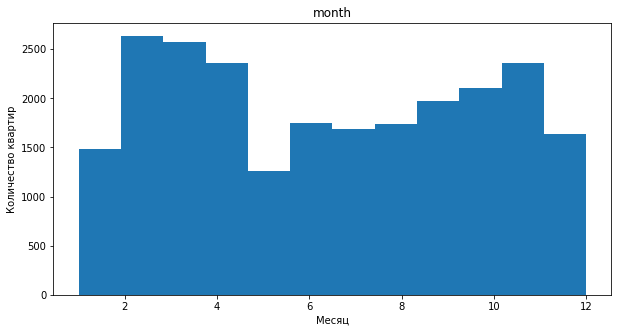

In [35]:
# Месяц публикации
df['month'].plot(kind='hist', figsize=(10, 5), bins=12, title='month',  range=(1, 12))
plt.ylabel('Количество квартир')
plt.xlabel('Месяц')
print('Мода:', df['month'].mode())


        Распределений колтчества публикаций по дням вполне логично. В будни выкладывается больше объяылений, чем в выходные. Так самым популярным днем недели был четверг - он же явялется и медианным значений. В выходные самая низкая активность - людям не до дел.
        Та же логика и в распределении по месяцам: декабрь/январь - праздничные дела и выходные, май -лето актвность также ниже - люди уходят в отпуска - аудитория потенциальных покупателй снижается, продавцы тоже. Самым популярным месяцем стал февраль.

### Как быстро продавались квартиры?

count   20,393.00
mean       180.75
std        219.74
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64
Мода: 0    45
dtype: int64


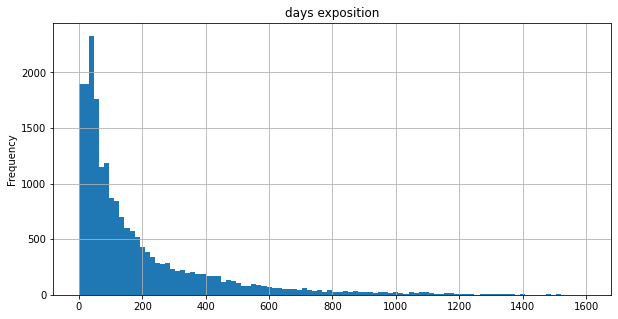

In [36]:

df['days_exposition'].plot(kind='hist', figsize=(10, 5), bins=100, title='days exposition', grid=True, range=(0, 1600))

print(df[df['days_exposition']!=-1]['days_exposition'].describe())
print('Мода:', df[df['days_exposition']!=-1]['days_exposition'].mode())

(1.0, 600.0)

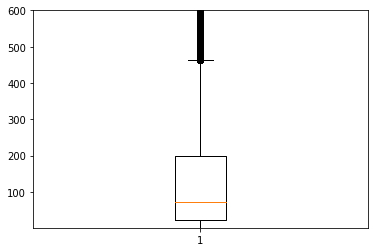

In [37]:
plt.boxplot(df['days_exposition'])
plt.ylim(1,600)

Распределение находится в диапозоне приблизительно 1 - 460 дней, среднее значение 180 дней, медиана 95д.
Объявления чаще всего были сняты через 45 дней, приблизим график, чтобы поближе рассмотреть распределение.

<AxesSubplot:title={'center':'days exposition'}, ylabel='Frequency'>

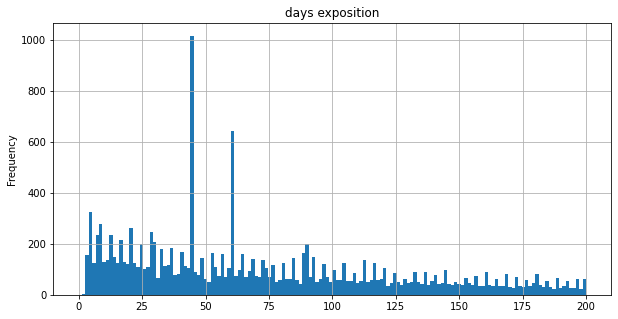

In [38]:
df['days_exposition'].plot(kind='hist', figsize=(10, 5), bins=150, title='days exposition', grid=True, range = (0,200))

Видим, что аномально много объявлений снимались не только через 45 дней, но и через 60. Скорее всего такое распределение связано с особенностями правил публикаций на ресурсе, данный вопрос лучше уточннить у менеджеров. Для того, чтобы ответить на поставленные вопросы о  скорости продажи, уберем из датасета данные days_exposition = 45 и = 60 дней.


count   18,977.00
mean       190.45
std        224.78
min          1.00
25%         42.00
50%        108.00
75%        249.00
max      1,580.00
Name: days_exposition, dtype: float64
Мода: 0    7
dtype: int64


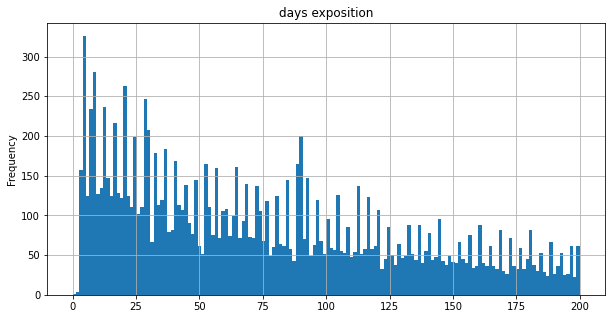

In [39]:
df_days = df.query('days_exposition != 45 and days_exposition != 60')


# Проверим, как изменился график
df_days['days_exposition'].plot(kind='hist', figsize=(10, 5), bins=150, title='days exposition', grid=True, range = (0,200))

# Пересчитаем стат. значения.
print(df_days[df_days['days_exposition']!=-1]['days_exposition'].describe())
print('Мода:', df_days[df_days['days_exposition']!=-1]['days_exposition'].mode())

(1.0, 600.0)

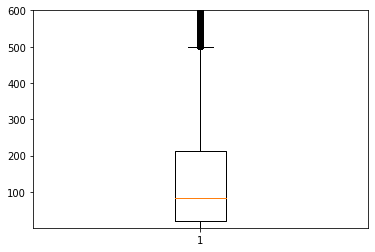

In [40]:
# построим боксплот, чтобы ответить на вопросы.
plt.boxplot(df_days['days_exposition'])
plt.ylim(1,600)


      Медиана увеличилась после удаления аномалий и стала 108. Нормальные значения стали  в диапозоне  приблизительно 1-500 дней. Среднее = 190 дней.   

        Вывод: Большая часть объявлений снимается до 250 дней. Быстрыми можно считать продажи до 42 дней, соответсвенно  долгими будем счиать продажи свыше 250 дней.
            

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Коэф. корреляции: 0.6536957721277887


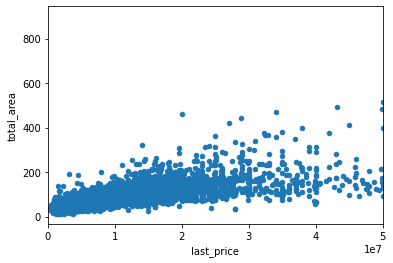

In [41]:
# Общая площадь
df.plot(x='last_price', y='total_area', kind='scatter')
plt.xlim(0, 50000000)
print('Коэф. корреляции:', df['last_price'].corr(df['total_area']))


Коэф.корреляции = 0,65 , что говорит о наличии влияния,хоть и не очень сильного, общей площади на цену.  

Коэф. корреляции: 0.5866735513985871


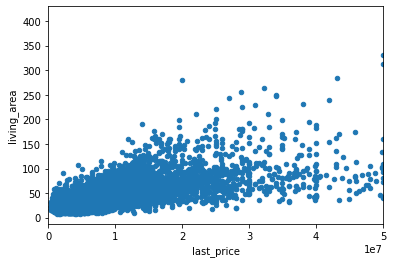

In [89]:
# Жилая площадь
df.plot(x='last_price', y='living_area', kind='scatter') 
plt.xlim(0, 50000000)
print('Коэф. корреляции:', df['last_price'].corr(df['living_area']))

Коэф. корреляции: 0.5153659105377588


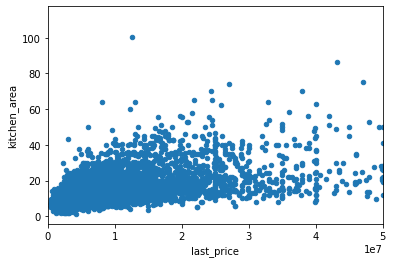

In [90]:
# Площадь кухни
df.plot(x='last_price', y='kitchen_area', kind='scatter') 
plt.xlim(0, 50000000)
print('Коэф. корреляции:', df['last_price'].corr(df['kitchen_area']))

        К.корреляции(жилая площадь) = 0,58
        К.корреляции(площадь кухни) = 0,51
        Данные коэф-ты говорят о наличии связи, но не слишком сильной. Следовательно, увеличение площадей приводит к росту 
        цены, но не всегда. 

Коэф. корреляции: 0.3631975197893474


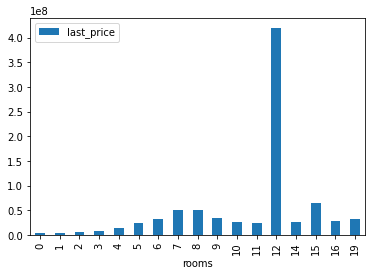

In [70]:
# Количество комнат
df.pivot_table(index='rooms', values='last_price').plot(kind='bar')
print('Коэф. корреляции:', df['last_price'].corr(df['rooms']))

<AxesSubplot:xlabel='rooms'>

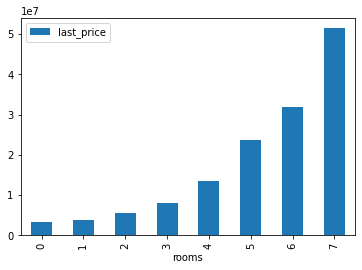

In [84]:
df.query('rooms < 8').pivot_table(index='rooms', values='last_price').plot(kind='bar')

Коэф. корреляции = 0,36
Значение низкое, возможно, связь слабая. Однако на графике четко видно, что с увеличением числа комнат растет цена объекта. Так до 7 комнат, далее цена скачет, нет точного тренда. После 7 - 8 комнат , возможно, присутсвуют бывшие коммуналки или многокомнатные хрущевки с микрокомнатами. Не помешало бы экспертное мнение в этом случве.

<AxesSubplot:xlabel='type_floor'>

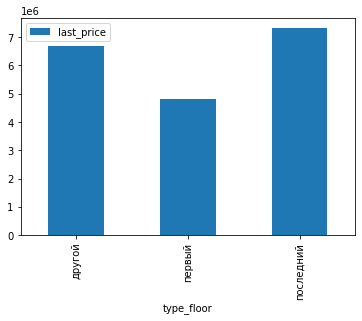

In [91]:
# Тип этажа
df.pivot_table(index='type_floor', values='last_price').plot(kind='bar')



            Цены на первом этаже оказались ниже остальных, а на последнем самые высокие. Можно предположить, что цена растет с увеличением  этажа. Последний этаж продается примерно на 30% дороже первого и примерно на 5,5% дороже "другого".
            Возможно, что на последних этажах встречаются террасы, и вобще последние этажи чаще ценят за их вид.

<AxesSubplot:xlabel='weekday'>

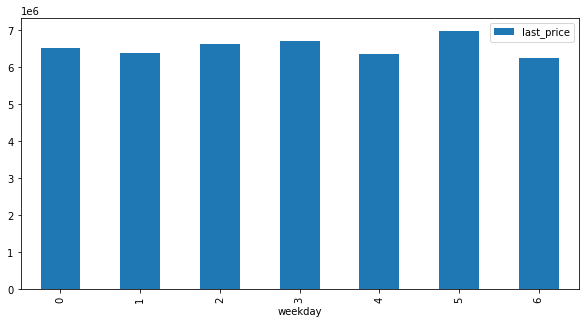

In [92]:
# Дата размещения объявления. День.
df.pivot_table(index='weekday', values='last_price').plot(kind='bar', figsize=(10, 5))


<AxesSubplot:xlabel='month'>

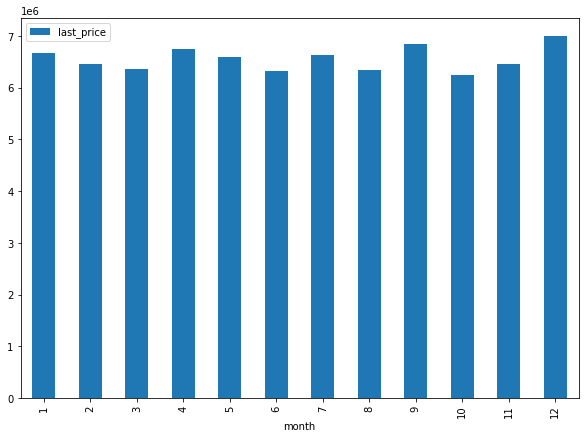

In [93]:
# Месяц размещения
df.pivot_table(index='month', values='last_price').plot(kind='bar', figsize=(10, 7))


      По дням и месяцам размещения нет яркой зависимоти цены от данных факторов. Все цены приблизительно на одном уровне.
            

<AxesSubplot:xlabel='year'>

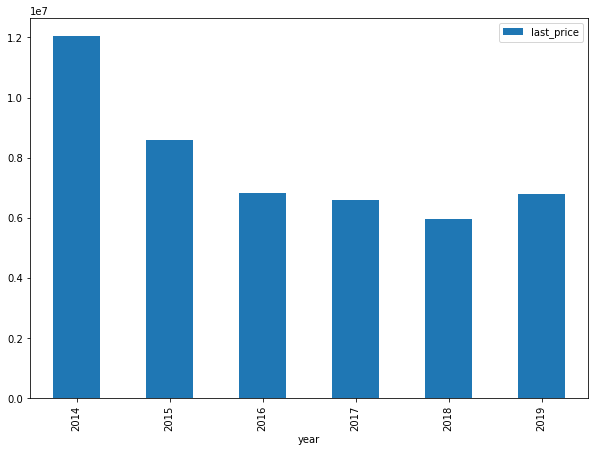

In [94]:
# Год размещения
df.pivot_table(index='year', values='last_price').plot(kind='bar', figsize=(10, 7))

        Напротив, в зависимости от года размещения менялась цена.
       Здесь сыграла роль непростая геополитическая ситуация и экономические потрясения, а именно обвал рубля. За счет чего мы видим, что цены на недвижимость начали падать после 2014го года, так как падал спрос в всязи с ухудшеним материального  положения населения, но к 2019 году положение немного выравнивается, и мы видим повышение цен, а значит активизировался спрос.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [75]:
top_10 = df['locality_name'].value_counts().head(10)
top_10last_price = df.query('locality_name in (@top_10.index)').pivot_table(values='cost_per_m2', index='locality_name')
top_10last_price = top_10last_price.astype('int')
top_10last_price.sort_values('cost_per_m2', ascending=False)

,cost_per_m2
locality_name,
Санкт-Петербург,114870
Пушкин,103125
Кудрово,95260
поселок Парголово,90175
Мурино,86041
поселок Шушары,78551
Колпино,75424
Гатчина,68746
Всеволожск,68654


        Самый дорогой кв.метр оказался в Санкт-Петербурге, что не удивительно. Далее следует Пушкин - самый дорогой из пригородов ценник за м2, т.к. Пушкин очень близко к городу и имеет хорошую инфраструктуру и отличную связь с СПБ, также это город, представляющий высокую историческую ценность, сюда хорошо развит туризм.
        Кудрово, Парголово, Мурино - районы новостроек, спрос на которые выше , чем на вторичке. Шушары -также район новостроек, но относительно новый и недостаточно развитый, отсюда и цена за метр более доступная.
        Остальные города застраиваются не так активно,как впередиидущие в списке города, и средняя формируется также за счет вторичного рынка.
        

### Вычислите среднюю цену каждого километра в СПб. Как стоимость объектов зависит от расстояния до центра города?

                  last_price
cityCenters_km              
0.00           31,449,115.85
1.00           21,206,720.83
2.00           17,788,319.61
3.00           11,137,394.69
4.00           13,304,279.53
5.00           14,455,995.62
6.00           15,338,418.39
7.00           14,775,152.59
8.00            9,949,111.38
9.00            6,977,188.40
10.00           6,500,434.16
11.00           6,228,107.86
12.00           5,834,618.70
13.00           6,077,642.60
14.00           5,625,172.80
15.00           5,876,322.99
16.00           5,373,130.56
17.00           5,299,495.92
18.00           5,091,331.32
19.00           5,051,410.03
20.00           5,951,464.84
21.00           5,493,469.37
22.00           5,415,524.28
23.00           4,961,392.86
24.00           3,854,429.62
25.00           4,052,839.92
26.00           4,014,287.05
27.00           8,300,000.00
28.00           5,026,428.57
29.00           4,236,666.67


<AxesSubplot:xlabel='cityCenters_km'>

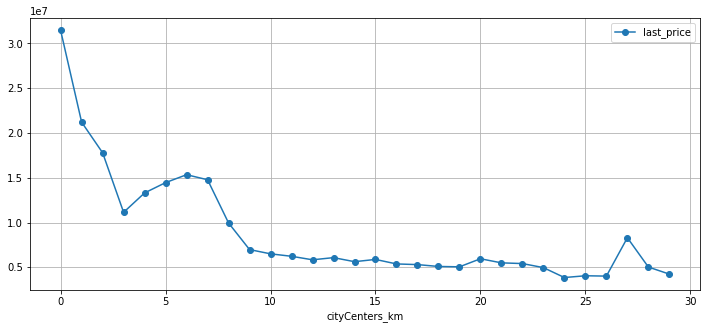

In [47]:
mean_price = df.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_km', values='last_price')
print(mean_price)
mean_price.plot(grid=True, figsize=(12, 5), style='o-')


Видим зависимость цены от удаленности от центра. Так, чем дальше от центра распотложен объект, тем его средняя цена будет ниже.

ВЫВОД: 
           
          Стоимость квартиры не имеет яркой зависимости от какого-то одного показателя. Как мы убедились каждый из  факторов по-своему влияет на общую цену квартиры,у зависимости более сложный мультифакторный характер. 
        Можем выделить общую площадь, количество комнат, удаленность от центра и экономическую ситуацию в целом.

 # Общий вывод

        Проведя предобработку датасета удалили пропуски в ст. floors_total, locality_name, исправили аномальные значения, некоторые удалили, провели работу с дубликатами, в том числе и неявными, в итоге дубликатов не было найдено. Также заполнили пропуски, где это было возможно, и мне показалось полезно, и  изменили тип данных.
        Добавили в таблицу столбцы с ценой м2, день/месяц/год публикации, тип этажа, удаленность от центра в км.
        Изучили параметры объектов и получили "портрет" самой часторазмещаемой квартиры, а именно квартира с 1ой комнатой, примерн 45м2, на "другом" этаже, стоимостью около 4,5 млн.р.,где-то в черте города, с небольшим расстоянием до парка. Объект с такими параметрами похож на квартиру в спальном районе.
        Изучив срок продажи квартиры, выяснили, что половину объектов было продано до 108 дней, быстрыми продажами можно считать срок до 42 дней, долгими- более 250 дней.
        Мы выяснили, что на общую стоимость объекта в большей степени имеют вляние следующие факторы: общая площадь, количество комнат, удаленность от центра, стабильность экономики. С увеличением площади и количества комнат растет цена, а чем дальше объект от центра, тем дешевле общая стоимость. 
        Оценили среднюю стоимость м2 в 10 городах с наибольшим числом объявлений. Конечно, лидирующие места заслуженно заняты Санкт-Петербургом и Пушкином, далее идут ближайшие районы новостроек(Кудрово,Мурино,Парголово, Шушары). Еще дальше (Колпино, Всеволожск, Гатчина и Выборг) города, в которых менее активная застройка и по другим факторам жить там менее удобно, чем в  первой шестерке.
        
        